# BM scGen test
## Xiaonan Wang
## 23May2020

In [2]:
import scgen
import scanpy as sc
import numpy as np
import anndata
import smqpp
import matplotlib.pyplot as plt
import pandas as pd
sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

# Batch correction for all

In [3]:
adata = sc.read('./write/BM789_processed.h5ad')

In [4]:
adata = anndata.AnnData(X=adata.raw.X, obs=adata.obs, var=adata.raw.var,obsm=adata.obsm)

In [5]:
sc.pp.filter_genes(adata, min_cells=1)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


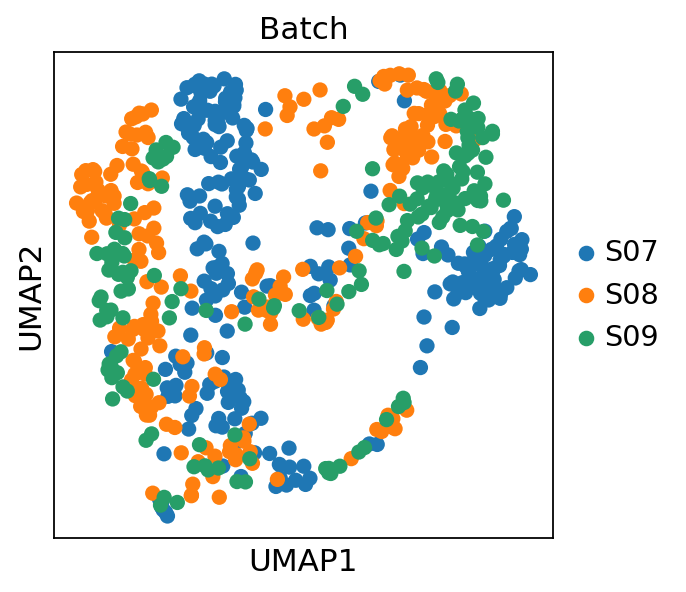

In [6]:
sc.pl.umap(adata, color='Batch')

In [7]:
network = scgen.VAEArith(x_dimension= adata.shape[1], model_path="./models/batch" )
network.train(train_data=adata, n_epochs=100)
corrected_adata =  scgen.batch_removal(network, adata, batch_key="Batch", cell_label_key="Cell_Type")
corrected_adata.write('./write/test.h5ad')


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


... storing 'CI_annotation_of_index' as categorical
... storing 'Cell_Type' as categorical
... storing 'Cell_type_general' as categorical
... storing 'Cell_type_subtype' as categorical
... storing 'Details' as categorical
... storing 'FACs_index_data' as categorical
... storing 'Index' as categorical
... storing 'Position_in_96_well_plate_RNA_seq' as categorical
... storing 'Position_in_96_well_plate_sorted' as categorical
... storing 'Sample_name' as categorical
... storing 'con_comb' as categorical


In [8]:
corrected_adata = sc.read('./write/test.h5ad')

In [9]:
sc.tl.pca(corrected_adata, svd_solver='arpack')
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

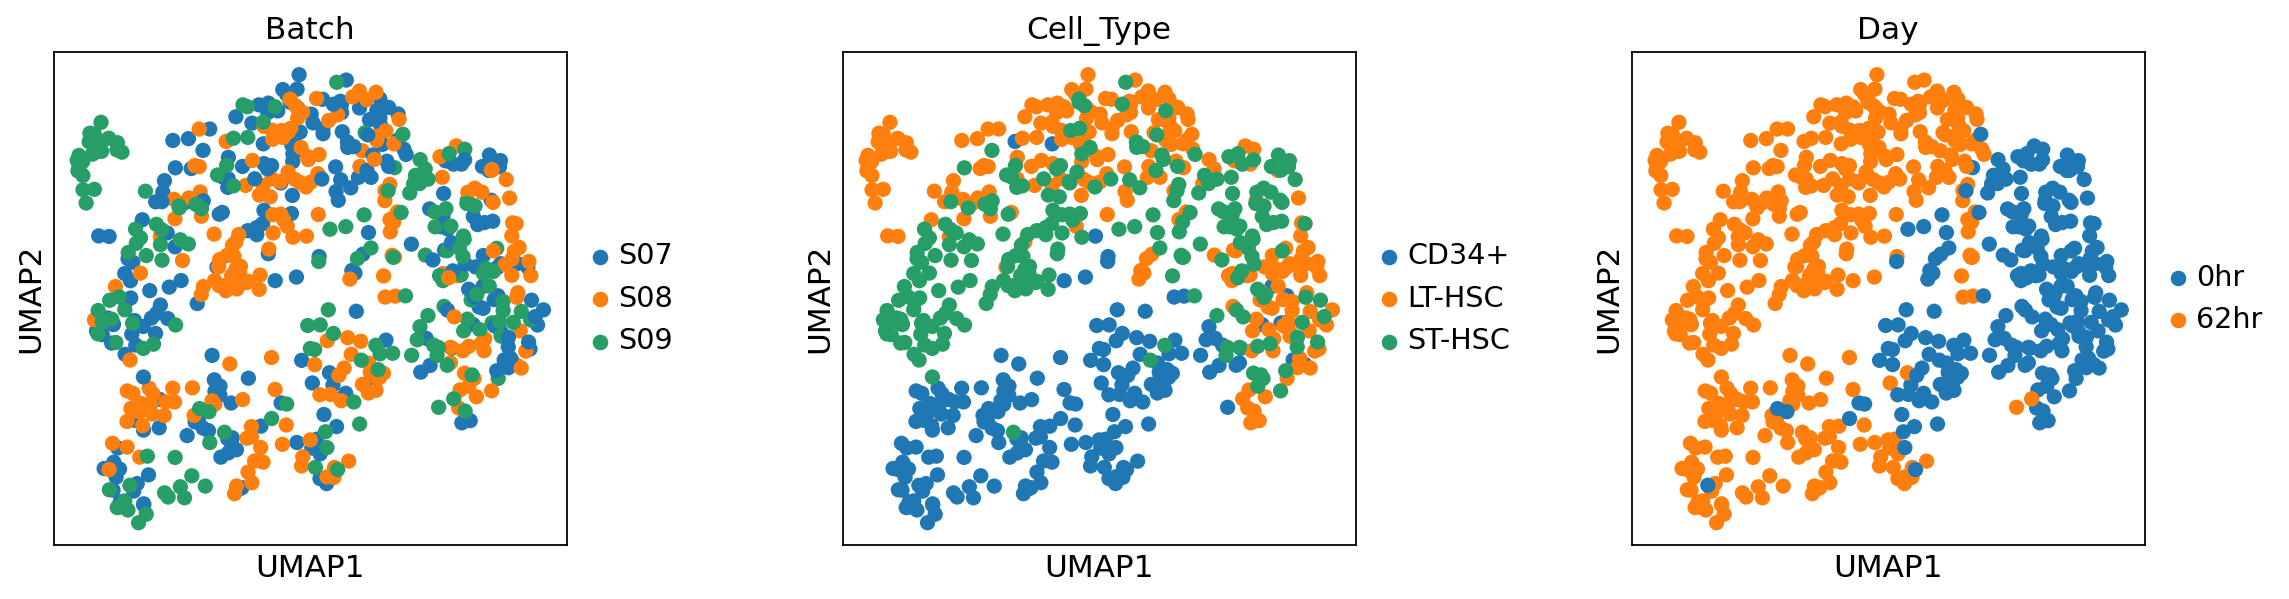

In [10]:
sc.pl.umap(corrected_adata, color=["Batch", "Cell_Type" , "Day"], wspace=.4)

# Batch correction separately

In [11]:
adata_day0 = adata[adata.obs['Day'] == '0hr'].copy()
adata_day3 = adata[adata.obs['Day'] == '62hr'].copy()

## Day0

In [12]:
network = scgen.VAEArith(x_dimension= adata_day0.shape[1], model_path="./models/batch1" )
network.train(train_data=adata_day0, n_epochs=100)
corrected_adata =  scgen.batch_removal(network, adata_day0, batch_key="Batch", cell_label_key="Cell_Type")
corrected_adata.write('./write/test_day0.h5ad')

... storing 'Cell_Type' as categorical
... storing 'Cell_type_general' as categorical
... storing 'Cell_type_subtype' as categorical
... storing 'Details' as categorical
... storing 'FACs_index_data' as categorical
... storing 'Position_in_96_well_plate_RNA_seq' as categorical
... storing 'Position_in_96_well_plate_sorted' as categorical
... storing 'Sample_name' as categorical
... storing 'con_comb' as categorical


In [13]:
corrected_adata = sc.read('./write/test_day0.h5ad')
sc.tl.pca(corrected_adata, svd_solver='arpack')
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

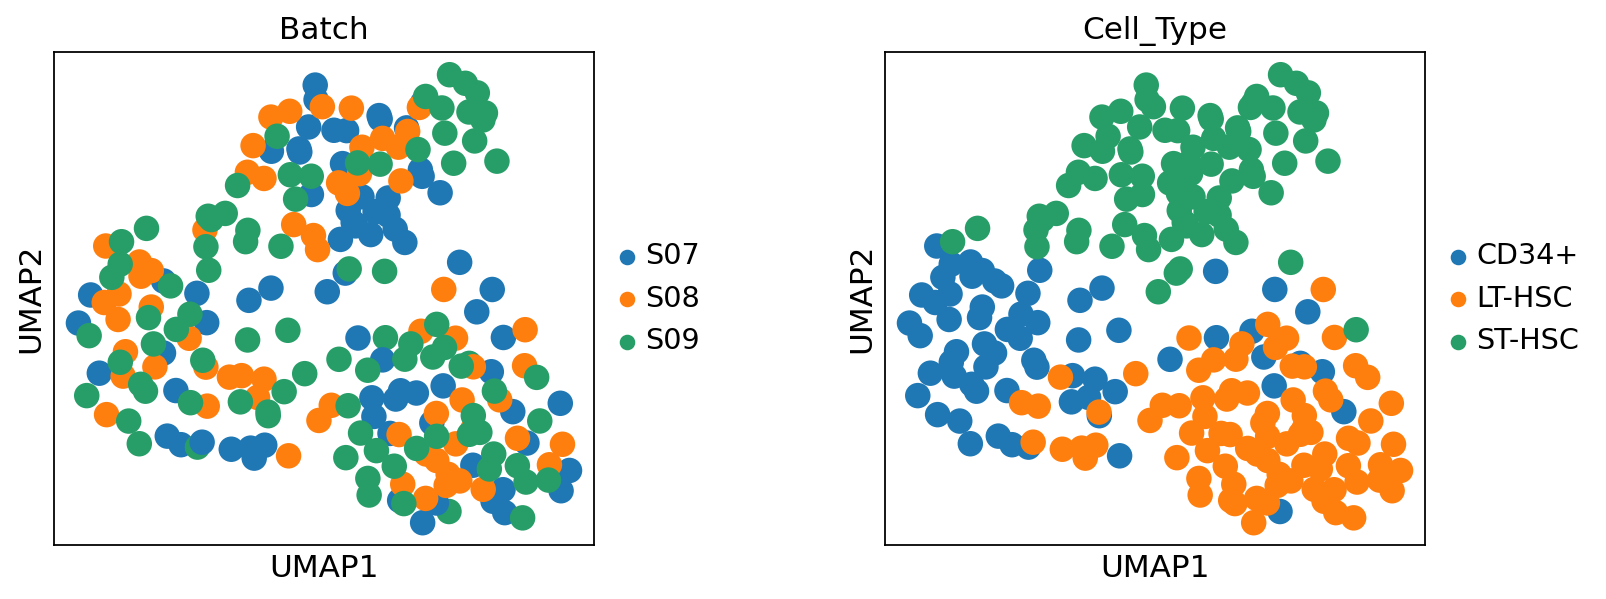

In [14]:
sc.pl.umap(corrected_adata, color=["Batch", "Cell_Type"], wspace=.4)

## Day3

In [15]:
network = scgen.VAEArith(x_dimension= adata_day3.shape[1], model_path="./models/batch2" )
network.train(train_data=adata_day3, n_epochs=100)
corrected_adata =  scgen.batch_removal(network, adata_day3, batch_key="Batch", cell_label_key="Cell_Type")
corrected_adata.write('./write/test_day3.h5ad')

... storing 'CI_annotation_of_index' as categorical
... storing 'Cell_Type' as categorical
... storing 'Cell_type_general' as categorical
... storing 'Cell_type_subtype' as categorical
... storing 'Details' as categorical
... storing 'FACs_index_data' as categorical
... storing 'Index' as categorical
... storing 'Position_in_96_well_plate_RNA_seq' as categorical
... storing 'Position_in_96_well_plate_sorted' as categorical
... storing 'Sample_name' as categorical
... storing 'con_comb' as categorical


In [16]:
corrected_adata = sc.read('./write/test_day3.h5ad')
sc.tl.pca(corrected_adata, svd_solver='arpack')
sc.pp.neighbors(corrected_adata)
sc.tl.umap(corrected_adata)

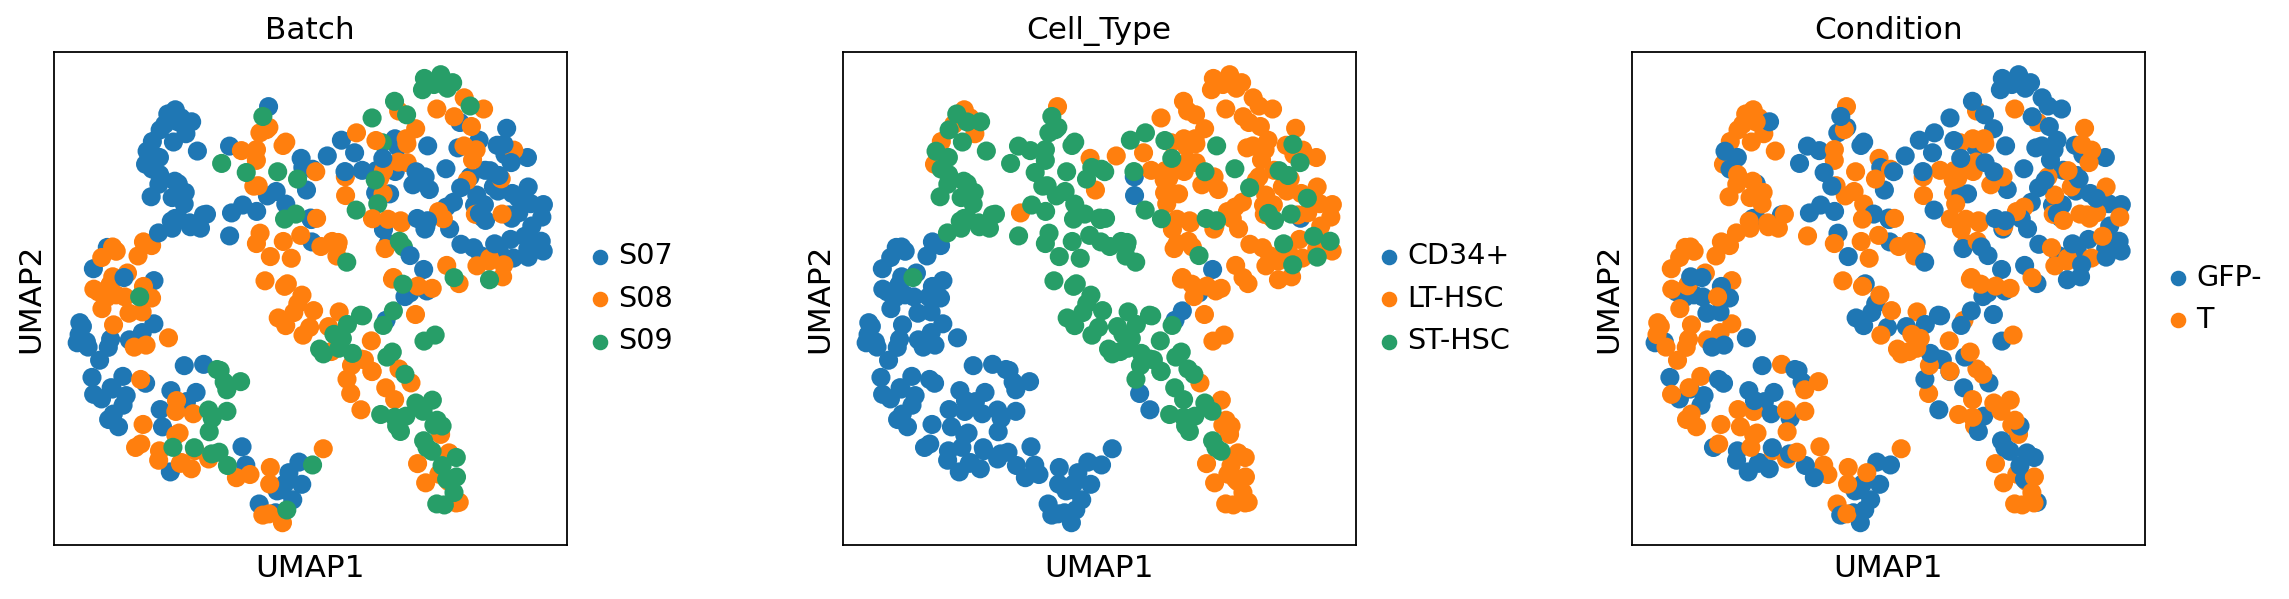

In [17]:
sc.pl.umap(corrected_adata, color=["Batch", "Cell_Type" ,'Condition'], wspace=.4)